<h1>Linear Regression 1D: Training One Parameter</h1>


<h2>Objective</h2><ul><li> How to create cost or criterion function using MSE (Mean Square Error).</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will train a model with PyTorch by using data that you created. The model only has one parameter: the slope.</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#Train">Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>20 min</strong></p>

<hr>


<h2>Preparation</h2>


The following are the libraries we are going to use for this lab.


In [1]:
# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [3]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = \
          [criterion(forward(X), Y) for w.data in self.parameter_values]  # defined below
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


In [4]:
import torch

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.


In [5]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

Let us plot the line.


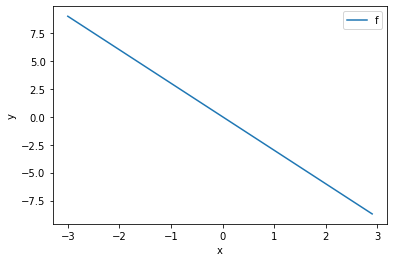

In [6]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Plot the <code>Y</code>: 


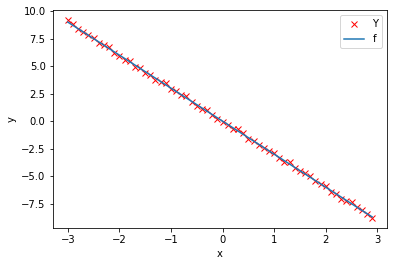

In [9]:
# Plot the data points
Y = f + 0.1 * torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.


First, define the <code>forward</code> function $y=w\*x$. (We will add the bias in the next lab.)


In [10]:
def forward(x):
    return w * x

Define the cost or criterion function using MSE (Mean Square Error): 


In [16]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Define the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:   


In [12]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument <code>requires_grad</code> to <code> True</code> because the system must learn it.


In [13]:
w = torch.tensor(-10.0, requires_grad = True)

Create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:


In [21]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<!--Empty Space for separating topics-->


<h2 id="Train">Train the Model</h2>


Let us define a function for training the model. The steps will be described in the comments.


In [22]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)  # returns a tensor

        gradient_plot(Yhat, w, loss.item(), epoch)
        LOSS.append(loss.item())

        loss.backward() # backward pass: compute gradient of the loss with respect to all the learnable parameters

        w.data = w.data - lr * w.grad.data  # update parameters
        w.grad.data.zero_() # zero the gradients before running the backward pass

Let us try to run 4 iterations of gradient descent:  


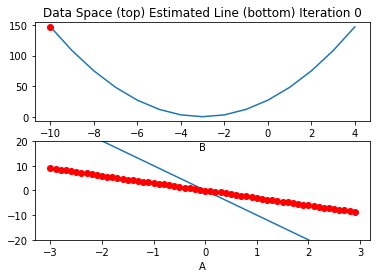

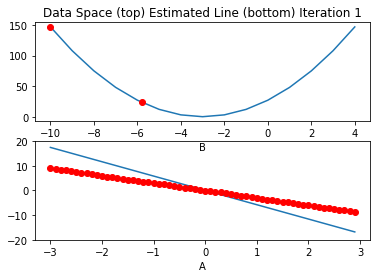

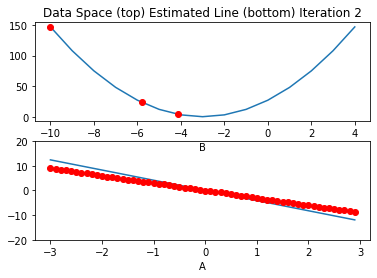

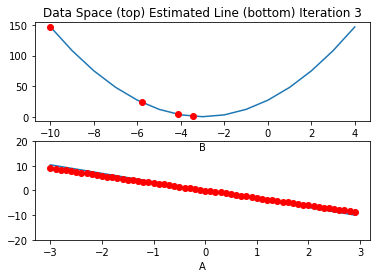

<Figure size 432x288 with 0 Axes>

In [23]:
train_model(4)

Plot the cost for each iteration: 


Text(24.0, 0.5, 'Cost')

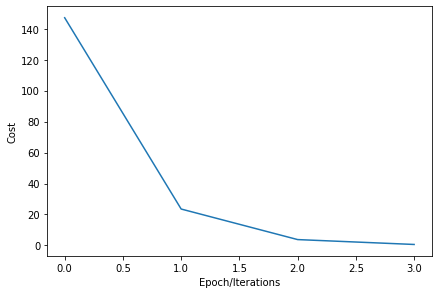

In [24]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<!--Empty Space for separating topics-->


<h3>Practice</h3>


Create a new learnable parameter <code>w</code> with an initial value of -15.0.


In [33]:
# Practice: Create w with the inital value of -15.0

w = torch.tensor(-15.0, requires_grad = True)
LOSS2 = []

def train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)  # returns a tensor

        gradient_plot(Yhat, w, loss.item(), epoch)
        LOSS2.append(loss.item())

        loss.backward() # backward pass: compute gradient of the loss with respect to all the learnable parameters

        w.data = w.data - lr * w.grad.data  # update parameters
        w.grad.data.zero_() # zero the gradients before running the backward pass

In [34]:
gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

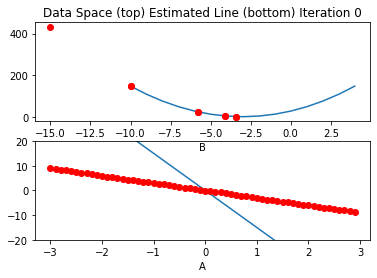

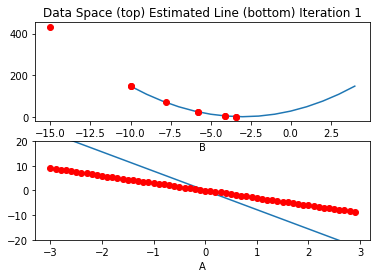

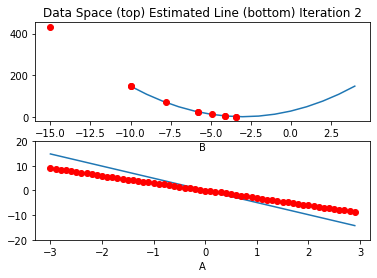

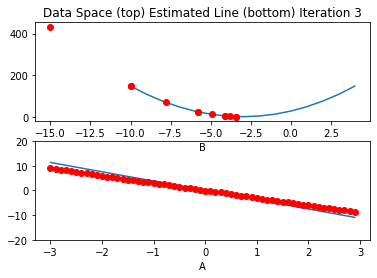

<Figure size 432x288 with 0 Axes>

In [36]:
train_model(4)

What does this tell you about the parameter value? 


Double-click <b>here</b> for the solution.

<!-- Your answer is below:
the parameter value is sensitive to initialization  
    -->


<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Shubham    | Migrated Lab to Markdown and added to course repo in GitLab |


<hr>


Copyright © 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.
